In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import re
from collections import Counter

# NLP libraries
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

from textblob import TextBlob
import spacy

In [2]:
# Load twentieth-century text file
with open("key_events_20th_century.txt", "r", encoding="utf-8", errors="ignore") as file:
    text_data = file.read()

In [3]:
print("Text file loaded successfully")
print("Number of characters:", len(text_data))

Text file loaded successfully
Number of characters: 115091


In [4]:
text_data[:1000]

'Key events of the 20th century - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main page Contents Current events Random article About Wikipedia Contact us Contribute Help Learn to edit Community portal Recent changes Upload file Special pages Search Search Appearance Donate Create account Log in Personal tools Donate Create account Log in Contents move to sidebar hide (Top) 1 Historic events in the 20th century Toggle Historic events in the 20th century subsection 1.1 World at the beginning of the century 1.1.1 "The war to end all wars": World War I (1914–1918) 1.2 Spanish flu 1.2.1 Russian Revolution and communism 1.3 Between the wars 1.3.1 Economic depression 1.3.2 The rise of dictatorship 1.4 Global war: World War II (1939–1945) 1.4.1 The war in Europe 1.4.2 Blitzkrieg 1.4.3 Operation Barbarossa 1.4.4 Turning tides 1.4.5 Operation Overlord 1.4.6 Final days 1.4.7 The war in the Pacific 1.4.7.1 Background 1.4.8 Japanese Expansion 1.4.9 Allied offensive

In [5]:
import nltk
nltk.download("punkt_tab")
nltk.download("punkt")   # also install standard punkt (safe)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nikik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# Tokenize words
from nltk.tokenize import word_tokenize
word_tokens = word_tokenize(text_data)

In [9]:
print("Total tokens:", len(word_tokens))
print(word_tokens[:20])

Total tokens: 22562
['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation']


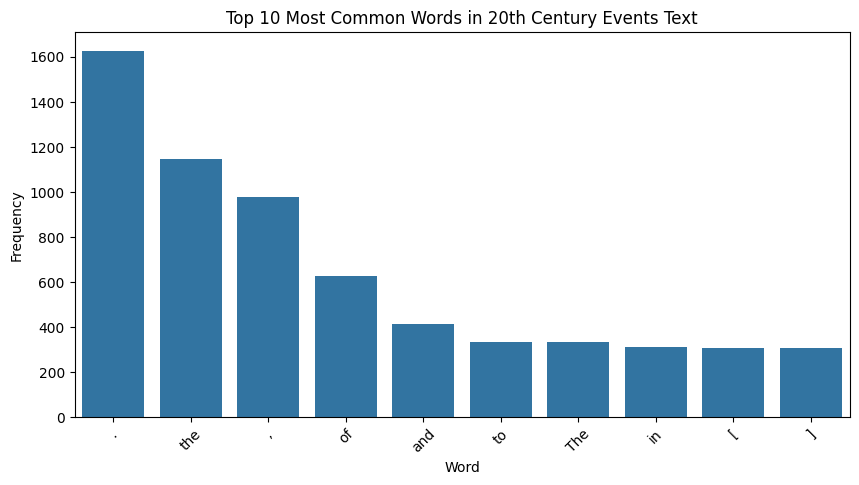

In [10]:
from nltk.probability import FreqDist

freq_dist = FreqDist(word_tokens)
top_10_words = freq_dist.most_common(10)

df_top10 = pd.DataFrame(top_10_words, columns=["Word", "Frequency"])

plt.figure(figsize=(10, 5))
sns.barplot(x="Word", y="Frequency", data=df_top10)
plt.title("Top 10 Most Common Words in 20th Century Events Text")
plt.xticks(rotation=45)
plt.show()

In [11]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

print(list(stop_words)[:20])

["mustn't", 'very', 'their', 'with', 'should', 'd', 'each', 'them', 'few', 'where', 'y', 'am', "weren't", 'don', "mightn't", 'will', "you've", 'shan', 'i', 'is']


In [14]:
filtered_words = [word for word in word_tokens if word.lower() not in stop_words]

print("Before:", len(word_tokens))
print("After stopword removal:", len(filtered_words))
print(filtered_words[:20])

Before: 22562
After stopword removal: 17038
['Key', 'events', '20th', 'century', '-', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'page', 'Contents', 'Current']


In [15]:
filtered_words = [
    re.sub(r"[^a-zA-Z]", "", word) 
    for word in filtered_words
]

# Remove empty strings
filtered_words = [word for word in filtered_words if word != ""]

print(filtered_words[:20])

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'page', 'Contents', 'Current', 'events']


In [16]:
from nltk.probability import FreqDist

freq_dist_clean = FreqDist(filtered_words)
freq_dist_clean

FreqDist({'December': 231, 'Retrieved': 210, 'War': 126, 's': 104, 'th': 86, 'war': 81, 'World': 78, 'Soviet': 56, 'Hitler': 51, 'History': 43, ...})

In [17]:
top_10_clean = freq_dist_clean.most_common(10)

df_top10_clean = pd.DataFrame(top_10_clean, columns=["Word", "Frequency"])
df_top10_clean

,Word,Frequency
0,December,231
1,Retrieved,210
2,War,126
3,s,104
4,th,86
5,war,81
6,World,78
7,Soviet,56
8,Hitler,51
9,History,43


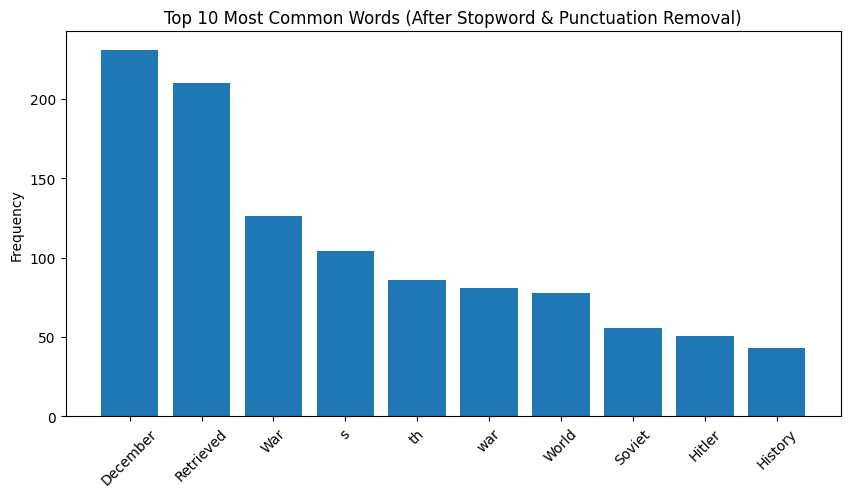

In [18]:
plt.figure(figsize=(10, 5))
plt.bar(df_top10_clean["Word"], df_top10_clean["Frequency"])
plt.title("Top 10 Most Common Words (After Stopword & Punctuation Removal)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

# Task 5 – Stop Word and Punctuation Removal
After removing stop words and punctuation, the most common words in the text changed significantly.
Instead of generic English words such as “the” and “of,” the plot now highlights more meaningful terms related to historical events, locations, and themes of the twentieth century.
This demonstrates how text preprocessing improves interpretability by allowing the analysis to focus on informative content rather than grammatical filler words.

In [19]:
clean_text = " ".join(filtered_words)

In [20]:
blob = TextBlob(clean_text)

In [21]:
tags_list = blob.tags

In [22]:
tags_list[:20]

[('Key', 'JJ'),
 ('events', 'NNS'),
 ('th', 'JJ'),
 ('century', 'NN'),
 ('Wikipedia', 'NNP'),
 ('Jump', 'NNP'),
 ('content', 'NN'),
 ('Main', 'NNP'),
 ('menu', 'NN'),
 ('Main', 'NNP'),
 ('menu', 'NN'),
 ('move', 'NN'),
 ('sidebar', 'NN'),
 ('hide', 'NN'),
 ('Navigation', 'NNP'),
 ('Main', 'NNP'),
 ('page', 'NN'),
 ('Contents', 'NNP'),
 ('Current', 'NNP'),
 ('events', 'NNS')]

In [23]:
df_tags = pd.DataFrame(tags_list, columns=["Word", "POS_Tag"])

In [24]:
df_tags.head()

,Word,POS_Tag
0,Key,JJ
1,events,NNS
2,th,JJ
3,century,NN
4,Wikipedia,NNP


In [25]:
df_tags = pd.DataFrame(tags_list, columns=["Word", "POS_Tag"])

In [26]:
df_tags.head()

,Word,POS_Tag
0,Key,JJ
1,events,NNS
2,th,JJ
3,century,NN
4,Wikipedia,NNP


In [27]:
pos_counts = (df_tags.groupby("POS_Tag") .count().reset_index().rename(columns={"Word": "Frequency"}))

In [28]:
pos_counts

,POS_Tag,Frequency
0,CC,1
1,CD,69
2,DT,7
3,FW,9
4,IN,109
5,JJ,1123
6,JJR,4
7,JJS,23
8,MD,59
9,NN,1729


In [29]:
top_10_pos = pos_counts.sort_values(
    by="Frequency", ascending=False
).head(10)

top_10_pos

,POS_Tag,Frequency
10,NNP,4839
9,NN,1729
5,JJ,1123
12,NNS,693
21,VBD,621
16,RB,334
22,VBG,238
24,VBP,156
23,VBN,146
4,IN,109


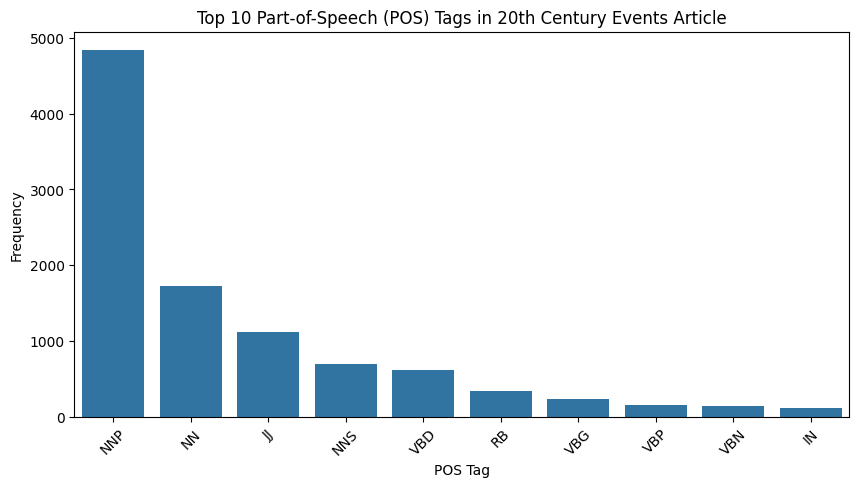

In [30]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x="POS_Tag",
    y="Frequency",
    data=top_10_pos
)

plt.title("Top 10 Part-of-Speech (POS) Tags in 20th Century Events Article")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

plt.show()

In [31]:
noun_tags = ["NN", "NNS", "NNP"]
verb_tags = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
adj_tags = ["JJ", "JJR", "JJS"]

In [32]:
df_nouns = df_tags[df_tags["POS_Tag"].isin(noun_tags)]

top_15_nouns = (
    df_nouns.groupby("Word")
    .count()
    .reset_index()
    .rename(columns={"POS_Tag": "Frequency"})
    .sort_values(by="Frequency", ascending=False)
    .head(15)
)

top_15_nouns

,Word,Frequency
385,December,231
1317,Retrieved,202
1669,War,126
2772,war,81
1709,World,78
2705,th,59
706,Hitler,51
2567,s,51
704,History,43
625,Germany,41


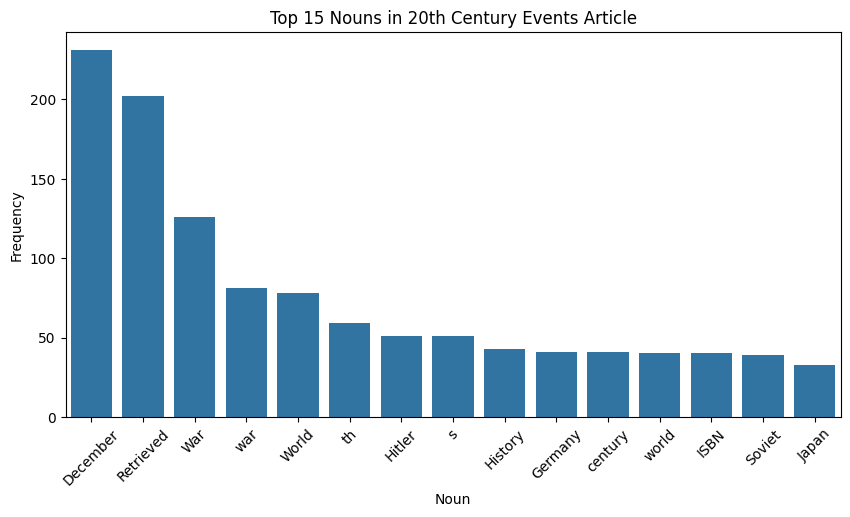

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="Word",
    y="Frequency",
    data=top_15_nouns
)
plt.title("Top 15 Nouns in 20th Century Events Article")
plt.xticks(rotation=45)
plt.xlabel("Noun")
plt.ylabel("Frequency")
plt.show()

# Top Nouns

The noun frequency plot is dominated by temporal terms such as December and conflict-related terms like war, world, and Hitler. This indicates that the text is strongly event- and chronology-focused, with particular emphasis on major twentieth-century conflicts.

In [34]:
df_verbs = df_tags[df_tags["POS_Tag"].isin(verb_tags)]

top_15_verbs = (
    df_verbs.groupby("Word")
    .count()
    .reset_index()
    .rename(columns={"POS_Tag": "Frequency"})
    .sort_values(by="Frequency", ascending=False)
    .head(15)
)

top_15_verbs

,Word,Frequency
613,s,35
94,became,29
439,led,15
459,made,14
731,used,13
97,began,13
122,came,12
433,launched,12
390,including,10
24,Retrieved,8


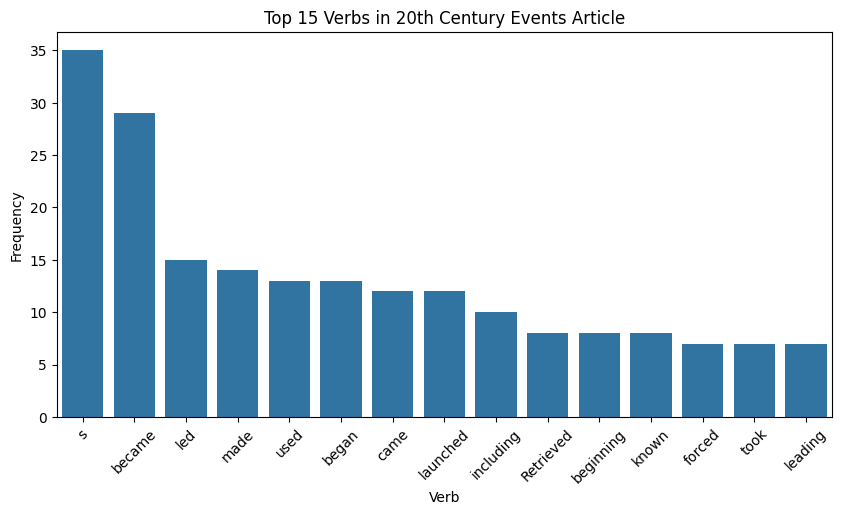

In [35]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="Word",
    y="Frequency",
    data=top_15_verbs
)
plt.title("Top 15 Verbs in 20th Century Events Article")
plt.xticks(rotation=45)
plt.xlabel("Verb")
plt.ylabel("Frequency")
plt.show()

# Top Verbs

The verb frequency plot is led by neutral, descriptive verbs such as became, led, made, and used. These verbs suggest that the article adopts an informational and explanatory tone, describing historical developments rather than emphasizing emotional or narrative language.

In [36]:
df_adjs = df_tags[df_tags["POS_Tag"].isin(adj_tags)]

top_15_adjs = (
    df_adjs.groupby("Word")
    .count()
    .reset_index()
    .rename(columns={"POS_Tag": "Frequency"})
    .sort_values(by="Frequency", ascending=False)
    .head(15)
)

top_15_adjs

,Word,Frequency
489,th,27
23,Japanese,26
357,nuclear,26
18,German,24
369,original,24
349,new,23
211,first,19
322,many,19
46,Soviet,17
2,American,15


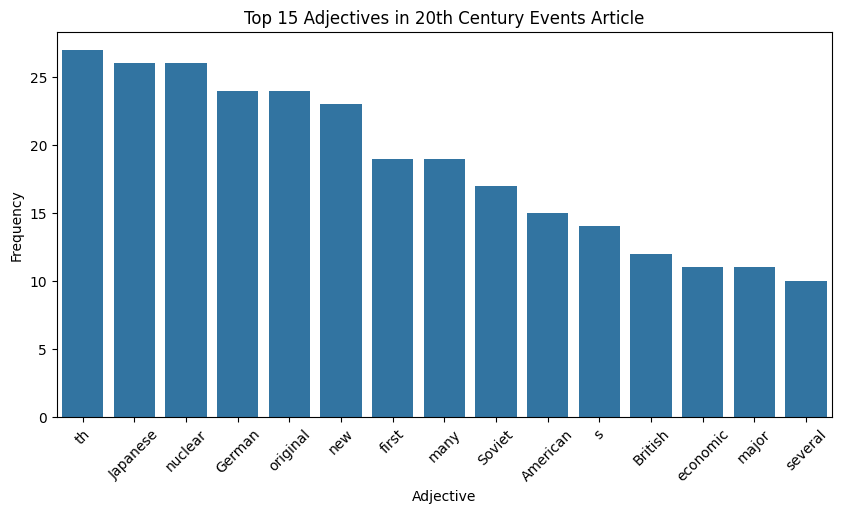

In [37]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="Word",
    y="Frequency",
    data=top_15_adjs
)
plt.title("Top 15 Adjectives in 20th Century Events Article")
plt.xticks(rotation=45)
plt.xlabel("Adjective")
plt.ylabel("Frequency")
plt.show()

# Top Adjectives

The adjective frequency plot highlights national and political descriptors such as Japanese, German, American, British, and Soviet, along with terms like nuclear and economic. This shows that the text focuses on national identities, geopolitical contexts, and large-scale political events, rather than personal or subjective descriptions.

In [38]:
countries = [
    "United States",
    "United Kingdom",
    "Germany",
    "France",
    "Russia",
    "Soviet Union",
    "Japan",
    "China",
    "Italy",
    "Spain",
    "India",
    "Poland",
    "Austria",
    "Hungary",
    "Turkey"
]

In [39]:
text_string = " ".join(filtered_words).lower()

country_counts = {}
for country in countries:
    country_counts[country] = text_string.count(country.lower())

df_countries = pd.DataFrame(
    country_counts.items(),
    columns=["Country", "Times_Mentioned"]
)

df_countries = df_countries[df_countries["Times_Mentioned"] > 0]
df_countries = df_countries.sort_values(
    by="Times_Mentioned",
    ascending=False
).reset_index(drop=True)

df_countries

,Country,Times_Mentioned
0,Japan,69
1,Germany,41
2,Soviet Union,32
3,United States,23
4,Russia,18
5,France,17
6,Italy,14
7,Poland,13
8,China,12
9,India,12


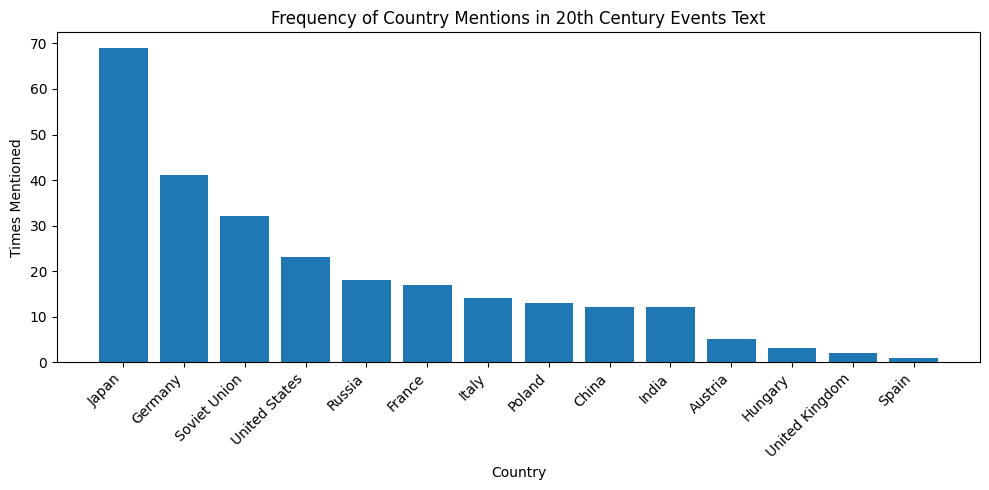

In [40]:
plt.figure(figsize=(10, 5))

plt.bar(
    df_countries["Country"],
    df_countries["Times_Mentioned"]
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Times Mentioned")
plt.title("Frequency of Country Mentions in 20th Century Events Text")

plt.tight_layout()
plt.show()

# The plot shows a highly uneven distribution of country mentions. Japan and Germany are mentioned far more often than other countries, highlighting their central role in major twentieth-century events, particularly global conflicts. Countries such as Russia and France appear moderately, while others are mentioned only a few times. Overall, the results indicate that the text focuses mainly on a small number of influential nations rather than providing balanced coverage across all countries.